# 03 평가

------------------

## 분류의 성능 평가 지표

+ 정확도

+ 오차행렬

+ 정밀도

+ 재현율

+ F1 스코어

+ ROC AUC

-------------------

## 01 정확도

+ 정확도는 직관적으로 모델 예측 성능을 나타내는 평가 지표이다. 하지만 이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있기 때문에 정확도 수치 하나만 가지고 성능을 평가하지 않는다.

+ 특히 정확도는 불균형한(imbalanced) 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한 평가 지표가 아니다.


__정확도 수치 하나만 가지고 성능을 평가했을 때 생기는 문제 예시로 알아보기__

타이타닉 예제에서 탑승객이 남자인 경우보다 여자인 경우에 생존 확률이 높았기 때문에 성별 하나만을 가지고 결정하는 별거 아닌 알고리즘(여자인 경우 생존, 남자인 경우 사망으로 예측)도 높은 정확도를 나타낼 수 있음



__이진 분류 문제에서 정확도 수치 하나만 가지고 성능을 평가했을 때 생기는 문제__

+ 타이타닉 예제

타이타닉 예제에서 탑승객이 남자인 경우보다 여자인 경우에 생존 확률이 높았기 때문에 성별 하나만을 가지고 결정하는 별거 아닌 알고리즘(여자인 경우 생존, 남자인 경우 사망으로 예측)도 높은 정확도를 나타낼 수 있음

단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측하는 매우 단순한 Classifier 만들기

In [3]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음.
    def fit(self, X, y=None):
        pass
    # predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측함.
    def predict(self, X):
        pred = np.zeros((X.shape[0],1))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1 :
                pred[i] = 0
            else :
                pred[i] = 1
                
        return pred

MyDummyClassifier와 앞에서 정의한 전처리 함수들을 이용해 앞 장의 타이타닉 생존자 예측 수행하기

In [4]:
# 데이터 전처리 함수 정의
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.7877


+ MNIST 데이터셋

MNIST 데이터 세트 : 원래 MNIST 데이터 세트는 레이블값이 0부터 9까지의 숫자 이미지의 픽셀 정보를 가지고 있으며, 이를 기반으로 숫자 Digit를 예측하는데 사용된다. 이를 레이블 값이 7인 것만 True, 나머지 값은 모두 False로 변환해 전체 데이터의 10%만 True, 나머지 90%을 False인 불균형한 데이터 세트로 변형해 사용해본다.

In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X):
        return np.zeros( (len(X), 1), dtype=bool)
    
# 사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits.data 살펴보기
print(digits.data)
print('### digits.data.shape: ', digits.data.shape)
print(digits.target)
print('### digits.data.shape: ', digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape:  (1797, 64)
[0 1 2 ... 8 9 8]
### digits.data.shape:  (1797,)


In [7]:
# digits() 번호가 7번이면 True고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [8]:
# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기 : ', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기 :  (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


이처럼 정확도 평가 지표는 불균형한 레이블 데이터 세트에서는 성능 수치로 사용돼서는 안된다. 정확도가 가지는 분류 평가 지표로서 이러한 한계점을 극복하기 위해 여러 가지 분류 지표와 함께 적용하여 ML 모델 성능을 평가해야 한다.

-----------------------

## 02. 오차 행렬(Confusion Matrix)

오차 행렬은 이진 분류의 예측 오류가 얼마인지와 더불어 어떤 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표이다. 즉, 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표이다.

![오차행렬](https://velog.velcdn.com/images%2Fsset2323%2Fpost%2F2fb704cf-8556-40fc-87a2-75b8feb32986%2Fimage.png)

+ TN: 예측값을 Negative값 0으로 예측했고 실제 값 역시 Negative값 0
+ FP: 예측값을 Positive값 1로 예측했는데 실제 값은 Negative 값 0
+ FN: 예측값을 Negative값 0으로 예측했는데 실제 값은 Positive 값 1
+ TP: 예측값을 Positive 값 1로 예측했는데 실제 값 역시 Positive 값 1

__오차 행렬을 통한 정확도 지표 문제점 인지__

In [9]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

+ TP는 0임. Positive로 예측이 한 건도 성공하지 않음
+ 이와 더불어 FP가 0이므로 Positive로 예측 자체를 수행하지 않음을 알 수 있음

정확도는 예측값과 실제 값이 얼마나 동일한가에 대한 비율만으로 결정된다. 즉, 오차 행렬에서 TN과 TP에 좌우된다. 

`(오차 행렬상에서) 정확도 = 예측 결과와 실제 값이 동일한 건수/전체 데이터 수 = (TN + TP)/(TN + FP + FN +TP)`

------------------------

## 03 정밀도와 재현율

+ 정밀도 = TP / (FP + TP) : 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻한다.

+ 재현율 = TP / (FN + TP) : 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻한다.

__업무에 따른 재현율과 정밀도의 상대적 중요도__

정밀도와 재현율 지표 중에 이진 분류 모델의 업무 특성에 따라서 특정 평가 지표가 더 중요한 지표로 간주될 수 있다. 

재현율이 중요 지표인 경우는 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우이다. 암 판단 모델은 재현율이 훨씬 중요하다. 실제 Positive인 암 환자를 Negative로 잘못 판단했을 경우 오류의 대가가 생명을 앗아갈 정도로 심각하기 때문이다.

정밀도가 더 중요한 지표는 실제 Negative 데이터를 Positive로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우이다. 스팸메일 여부를 판단하는 모델의 경우 실제 postive인 스팸 메일을 negative인 일반 메일로 분류하더라도 사용자가 불편함을 느끼는 정도이지만, 실제 negative인 일반 메일을 positive인 스팸 메일로 분류할 경우에는 메일을 아예 받지 못하게 돼 업무에 차질이 생긴다.

> 불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 많은 데이터 중에서 중점적으로 찾아야 하는 매우 적은 수의 결괏값에 Positive를 설정해 1값을 부여하고, 그렇지 않은 경우는 Negative로 0값을 일반적으로 부여한다.

재현율과 정밀도 모두 TP를 높이는 데 동일하게 초점을 맞추지만, 재현율은 FN을 낮추는데, 정밀도는 FP를 낮추는데 초점을 맞춘다. 가장 좋은 성능 평가는 재현율과 정밀도 모두 높은 수치를 얻는 것이며 둘 중 어느 한 평가 지표만 매우 높고, 다른 수치는 매우 낮은 결과를 나타내는 경우는 바람직하지 않다.

__오차 행렬 및 정밀도, 재현율을 구해서 예측성능 평가 (타이타닉 예제)__

In [10]:
# 오차 행렬 및 정밀도, 재현율 계산 함수 정의

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy, precision, recall))

이제 로지스틱 회귀 기반으로 타이타닉 생존자를 예측하고 confusion matrix, accuracy, precision, recall 평가를 수행한다. LogisticRegerssion 객체의 생성 인자로 입력되는 solver='liblinear'는 로지스틱 회귀의 최적화 알고리즘 유형을 지정하는 것이다.

보통 작은 데이터 세트의 이진 분류인 경우 solver는 liblinear가 약간 성능이 좋은 경향이 있다. solver의 기본값은 ibfgs이며 데이터 세트가 상대적으로 크고 다중 분류인 경우 적합하다.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.20, random_state=11)
lr_clf = LogisticRegression(solver='liblinear') 
lr_clf.fit(X_train, y_train)

pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705


## 정밀도/재현율 트레이드오프

+ 분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있다.

+ 하지만 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽다. 이를 정밀도/재현율의 트레이드오프(Trade-off)라고 부른다.

### __분류 결정 임곗값에 따른 Positive 예측 확률 변화__

+ 정밀도 = TP/(FP+TP)
+ 재현율 = TP/(FN+TP)

분류 결정 임곗값은 Positive 예측값을 결정하는 확률의 기준이 된다. `임곗값이 낮아지면` Positive로 예측을 더 너그럽게 하기 때문에 임곗값 값을 낮출수록 True 값이 많아지게 된다. Positive 예측값이 많아지면 실제 양성을 음성으로 예측하는 횟수가 상대적으로 줄어들기 때문에 `재현율 값이 높아진다.` 

+ 사이킷런 Estimator 객체의 predict_proba() 메소드는 분류 결정 예측 확률을 반환한다.
+ 이를 이용하면 임의로 분류 결정 임곗값을 조정하면서 예측 확률을 변경할 수 있다. 
+ 사이킷런은 precisoin_recall_curve() 함수를 통해 임곗값에 따른 정밀도, 재현율의 변화값을 제공한다.

------------------------
`predict_proba() 메소드`는 예측 확률을 반환한다. 학습이 완료된 사이킷런 Classifier 객체에서 호출이 가능하며 테스트 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환한다.

predict() 메서드는 predict_proba() 메서드에 기반하며 0과 1에 대한 확률중 더 큰 확률 값으로 predict()메서드가 최종 예측한다.


__predict_proba() 메소드 확인__

In [26]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 shape: {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935228 0.55064772]
 [0.86335513 0.13664487]
 [0.86429645 0.13570355]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935228 0.55064772 1.        ]
 [0.86335513 0.13664487 0.        ]
 [0.86429645 0.13570355 0.        ]]


__Binarizer 활용__

binarizer객체의 fit_transform() 메서드를 이용해 넘파이 ndarray를 입력하면 입력된 ndarray의 값을 지정된 threshold보다 같거나 작으면 0값으로, 크면 1값으로 변환해 반환한다.

In [14]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

# X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


+ __Binarizer를 이용해 사이킷런 predict()의 의사(presudo) 코드 만들기__

LogisticRegression 객체의 predict_proba() 메서드로 구한 각 클래스별 예측 확률값인 pred_proba 객체 변수에 분류 결정 임곗값(threshold)을 0.5로 지정한 Binarizer 클래스를 적용해 최종 예측값을 구하는 방식이다. 최종 예측값에 대해 get_clf_eval() 함수를 적용해 평가 지표도 출력해본다.

__분류 결정 `임계값 0.5` 기반에서 Binarizer를 이용하여 예측값 반환__

In [15]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값. 분류 결정 임계값임.
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705


__분류 결정 `임계값 0.4` 기반에서 Binarizer를 이용하여 예측값 반환__

In [16]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤
custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarier = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705


__여러개의 분류 결정 임곗값을 변경하면서 Binarizer를 이용하여 예측값 반환__

임계값을 0.4에서 부터 0.6까지 0.05씩 증가시키며 평가 지표 조사

In [18]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list객체 내의 값을 차례로 iteration하면서 Evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',  custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도 : 0.8212, 정밀도 : 0.7042, 재현율 : 0.8197
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도 : 0.8547, 정밀도 : 0.7869, 재현율 : 0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도 : 0.8715, 정밀도 : 0.8654, 재현율 : 0.7377
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도 : 0.8771, 정밀도 : 0.8980, 재현율 : 0.7213


__precision_recall_curve()를 이용하여 임곗값에 따른 정밀도•재현율 값 추출__

In [27]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions Shape 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

# 반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index],2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index],3))

반환된 분류 결정 임곗값 배열의 Shape: (147,)
반환된 precisions Shape 배열의 Shape: (148,)
반환된 recalls 배열의 Shape: (148,)
샘플 추출을 위한 임곗값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
샘플 임계값별 정밀도:  [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


__임곗값의 변경에 따른 정밀도•재현율 변화 곡선 그리기__

precision_recall_curve()를 사용

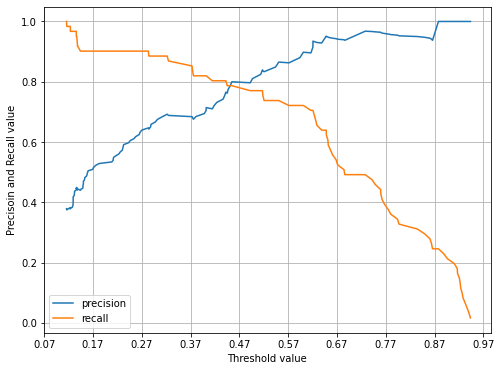

In [28]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarry와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='-', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # thresholds 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precisoin and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

### __정밀도와 재현율의 맹점__

임곗값의 변경은 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용돼야 한다. 그렇지 않고 단순히 하나의 성능 지표 수치를 높이기 위한 수단으로 사용돼서는 안 된다.

__정밀도가 100%가 되는 방법__

확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측한다. 정밀도 = TP / (TP + FP) 이므로 단 1건이라도 확실한 Positive만 Positive라고 예측하고 나머지는 모두 Negative로 예측하더라도 FP는 0, TP는 1이 되므로 정밀도는 1/(1+0)으로 100%가 된다. 

__재현율이 100%가 되는 방법__

모든 객체를 Positive로 예측한다. 재현율 = TP / (TP + FN) 이므로 모든 객체를 Positive로 예측하면 FN은 아예 0이 되므로 재현율은 100%가 된다.

## 04 F1 스코어

F1 스코어(Score)는 정밀도와 재현율을 결합한 지표이다. F1 스코어는 정밀도와 재현율이 어느 한쪽으로 치우지지 않는 수치를 나타낼 때 상대적을 높은 값을 가진다.

![F1스코어](https://blog.kakaocdn.net/dn/vOUcz/btq9bkbtA3H/Zteje3Hqhfp3lrZBJ5hxyK/img.png)

+ 사이킷런은 f1 score를 위해 f1_score() 함수를 제공한다.

------------------

__f1_score() 를 통해 F1 스코어 구하기__

In [30]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7966


__임곗값을 변화시키면서 F1 스코어를 포함한 평가 지표 구하기__

get_clf_eval() 함수에 F1스코어를 구하는 로직을 추가하고 get_eval_by_threshold() 함수를 이용해 임곗값 별로 정확도, 정밀도, 재현율, F1스코어 알아보기

In [32]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))
    
    thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
    pred_proba = lr_clf.predict_proba(X_test)
    get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

## 05 ROC 곡선과 AUC

ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표이다. 일반적으로 의학 분야에서 많이 사용되지만 머신러닝의 이진 분류 모델의 예측 성능을 판단하는 중요한 평가지표이기도 하다.



+ TPR = TP / (FN + TP) : 실제값 Positive가 정확히 예측돼야 하는 수준 (재현율을 나타내며 민감도로도 불림)

+ FPR = FP / (FP + TN) : 실제 Negative(음성)을 잘못 예측한 비율

![ROC 곡선과 AUC](https://user-images.githubusercontent.com/98722581/167999080-cd124bde-5456-4f98-bc7a-4de750c86219.png)

+ ROC 곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선이다. FPR을 X 축으로, TPR을 Y축으로 잡으면 FPR의 변화에 따른 TPR의 변화가 곡선 형태로 나타난다.

> 분류 결정 임곗값을 변경함으로써 FPR을 0 부터 1까지 변경할 수 있다.
> 
> ( FPR을 0으로 만드려면 임곗값을 1로, FPR을 1로 만드려면 임곗값을 0으로 지정 )

+ 분류의 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC값으로 결정한다. AUC값은 ROC 곡선 밑의 면적을 구한 것으로서 `일반적으로 1에 가까울수록 좋은 수치이다.`

+ 가운데 직선은 ROC 곡선의 최저 값으로 랜덤 수준의 이진분류의 ROC 직선이다. (AUC는 0.5)

+ 사이킷런은 ROC 곡선을 구하기 위해 roc_curve() API를 제공한다.

--------------------

__roc_curve() API를 이용해 타이타닉 생존자 예측 모델의 FPR, TPR, 임곗값 구하기__

앞서 학습한 LogisticRegression 객체의 predict_proba() 결과를 다시 이용해 roc_curve()의 결과를 도출.

In [120]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

In [121]:
# 모든 임계값에 따른 FPR, TPR

fprs, tprs, thresholds

(array([0.  , 0.01, 0.01, 0.02, 0.02, 0.03, 0.03, 0.04, 0.04, 0.05, 0.05,
        0.08, 0.08, 0.09, 0.09, 0.12, 0.12, 0.15, 0.15, 0.18, 0.18, 0.21,
        0.21, 0.24, 0.24, 0.26, 0.26, 0.27, 0.27, 0.28, 0.28, 0.35, 0.35,
        0.38, 0.38, 0.4 , 0.4 , 0.42, 0.42, 0.43, 0.43, 0.52, 0.52, 0.55,
        0.55, 0.7 , 0.7 , 1.  ]),
 array([0.        , 0.        , 0.2037037 , 0.2037037 , 0.25925926,
        0.25925926, 0.27777778, 0.27777778, 0.48148148, 0.48148148,
        0.5       , 0.5       , 0.51851852, 0.51851852, 0.61111111,
        0.61111111, 0.64814815, 0.64814815, 0.66666667, 0.66666667,
        0.68518519, 0.68518519, 0.7037037 , 0.7037037 , 0.72222222,
        0.72222222, 0.74074074, 0.74074074, 0.77777778, 0.77777778,
        0.7962963 , 0.7962963 , 0.81481481, 0.81481481, 0.83333333,
        0.83333333, 0.85185185, 0.85185185, 0.90740741, 0.90740741,
        0.92592593, 0.92592593, 0.94444444, 0.94444444, 0.98148148,
        0.98148148, 1.        , 1.        ]),
 array([1.97

In [122]:
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출.
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index],2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값 별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값 별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값:  [0.98 0.78 0.63 0.48 0.39 0.35 0.3  0.24 0.17 0.11]
샘플 임곗값 별 FPR:  [0.01 0.03 0.08 0.12 0.21 0.26 0.35 0.4  0.52 0.7 ]
샘플 임곗값 별 TPR:  [0.    0.278 0.5   0.648 0.685 0.741 0.796 0.852 0.926 1.   ]


__FPR의 변화에 따른 TPR의 변화를 ROC 곡선으로 시각화__

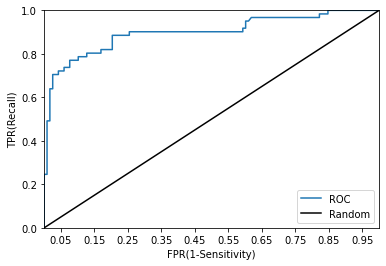

In [37]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음.
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0, 1], [0, 1], 'k-', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:, 1])

__AUC 값 구하기__

In [38]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8987


__get_clf_eval() 함수에 roc_auc_score()를 이용해 ROC AUC값을 측정하는 로직 추가하기__

ROC AUC는 예측 확률값을 기반으로 계산되므로 이를 get_clf_eval() 함수의 인자로 받을 수 있도록 get_clf_eval(y_test, pred=None, pred_proba=None)로 함수형을 변경해 준다.

In [40]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

## 06 피마 인디언 당뇨병 예측

당뇨병 여부를 판단하는 머신러닝 예측 모델을 수립하고, 지금까지 설명한 평가지표를 적용해보기

----------

__diabetes.csv 로드 후 데이터를 개략적으로 확인__

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


피마 인디언 당뇨병 데이터 세트 구성

+ Pregnancies : 임신 횟수
+ Glucose : 포도당 부하 검사 수치
+ BloodPressure : 혈압(mm Hg)
+ SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
+ Insulin : 혈청 인슐린(mu U/ml)
+ BMI : 체질량지수(체중(kg)/(키(m))^2)
+ DiabetesPedigreeFunction : 당뇨 내력 가중치 값
+ Age : 나이
+ Outcome : 클래스 결정 값(0 또는 1)

__Outcome 클래스 결정값의 분포 확인__

In [123]:
print(diabetes_data['Outcome'].value_counts())

0    500
1    268
Name: Outcome, dtype: int64


__featur의 타입과 Null 개수 확인__

In [72]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


__get_clf_eval(), precision_recall_curve_plot() 재로딩__

In [127]:
# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [129]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

__로지스틱 회귀를 이용해 학습 및 예측 및 평가 수행__

In [73]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출
# 맨 끝이 Outcome 칼럼으로 레이블 값임. 칼럼 위치 -1을 이용해 추출
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926, F1: 0.6465, AUC: 0.8083


__ROC 곡선 시각화__

precision_recall_curve_plot() 함수 이용

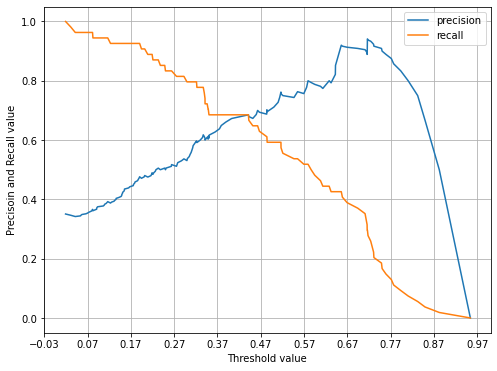

In [74]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

정밀도와 재현율이 균형을 맞추도록 임곗값을 0.42정도로 낮추면 두개의 지표 모두 0.7이 안되는 수치가 된다. 임곗값을 인위적으로 조작하기 전에 다시 데이터 값을 점검한다. 

__각 피쳐들의 값 4분위 분포 확인__

In [130]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


min()값이 0인 피처가 상당히 많다. 그 중 Glucose(포도당 수치)의 min값이 0인 것은 부적절하다. 따라서 Glucose 피처의 히스토그램을 그려 분포를 확인한다.

__Glucose 피처의 분포도__

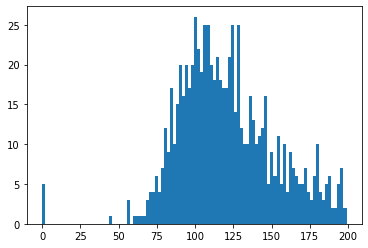

In [76]:
plt.hist(diabetes_data['Glucose'], bins=100)
plt.show()

__0값이 있는 피처들에서 0값의 데이터 건수와 퍼센트 계산__

'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'에 대해 0값의 건수 및 전체 데이터 건수 대비 몇 퍼센트의 비율로 존재하는지 확인하기

In [77]:
# 0값을 검사할 피처명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count)) 

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


__0값을 평균값으로 대체__

SkinThicknes와 Insulin의 0 값은 각각 전체의 29.56 %, 48.70 %로 대단히 많다. 따라서 데이터를 일괄 삭제하지 않고 위 피처의 0값을 평균값으로 대체한다.

In [78]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0, mean_zero_features)

__StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용하고 0값을 평균값으로 대체한 데이터 세트로 학습/예측__

로지스틱 회귀의 경우 일반적으로 숫자 데이터에 스케일링을 적용하는것이 좋다. 이후에 다시 학습/테스트 데이터 세트로 나누고 로지스틱 회귀를 적용해 성능 평가 지표를 확인한다.

In [104]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler( )
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC: 0.8433


__분류 결정 임계값을 변경하면서 성능 측정__

여전히 재현율 수치의 개선이 필요해 보이므로 분류 결정 임곗값을 변화시키면서 재현율 값의 성능 수치가 어느정도나 개선되는지 확인해보기

In [106]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

In [107]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.3
오차 행렬
[[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963, F1: 0.6615, AUC: 0.8433
임곗값: 0.33
오차 행렬
[[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778, F1: 0.6774, AUC: 0.8433
임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222, F1: 0.6667, AUC: 0.8433
임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037, F1: 0.6667, AUC: 0.8433
임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667, F1: 0.6792, AUC: 0.8433
임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667, F1: 0.6857, AUC: 0.8433
임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC: 0.8433
임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC: 0.8433


학습된 로지스틱 회귀 모형을 이용해 임곗값을 0.48로 낮춘 상태에서 다시 예측하기

사이킷런의 predict()메서드는 임곗값을 마음대로 변환할 수 없으므로 별도의 로직으로 이를 구해야한다. Binarizer클래스를 이용해 predict_proba()로 추출한 예측 결과 확률 값을 변환해 변경된 임곗값에 따른 예측 클래스 값을 구한다.

In [108]:
# 임곗값를 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 컬럼값을 Binarizer변환. 
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1)) 

get_clf_eval(y_test , pred_th_048, pred_proba[:, 1])

오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC: 0.8433
